**Introduction**

In this work, we will try to analyze the relationship of selling price of second hand car based on few features for only Audi brand, this is a kind of exploratory work, not trying to solve any specific problem, rather trying to getting an insigth about it.

The file source is "Kaggle"(https://www.kaggle.com/datasets/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw), one of the trusted source for data set for learner. 

In this EDA (Exploratory Data Analysis), few questions will be tried to answer, which will follow one by one with resutls and the code in the subsequent section.

**Importing Libraries**

This is the first section of the code, where the necessary library/modules are imported.

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

**Importing and reading the the data file**

In this step, the data file which is analyzed would be read, the file is downloaded from the source in csv format, one of the most common type, and could be read with simple built-in function.

After importing, a simple check is done to make sure the data set is working correctly.

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/audi.csv")

In [15]:
display(df) #to check it is done correctly

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4


Now, we will try to explore the data based on 3 features:  model, transmission, and fuelType. For each feature, we will try to check some basic information including top 5 selling car, their avg selling price, and total sell. But first, check some basic info of the data set.

In [16]:
df.describe(include="all")

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
count,10668,10668.000000,10668.000000,10668,10668.000000,10668,10668.000000,10668.000000
unique,26,NaN,NaN,3,NaN,3,NaN,NaN
top,A3,NaN,NaN,Manual,NaN,Diesel,NaN,NaN
freq,1929,NaN,NaN,4369,NaN,5577,NaN,NaN
mean,NaN,2017.100675,22896.685039,NaN,24827.244001,NaN,50.770022,1.930709
std,NaN,2.167494,11714.841888,NaN,23505.257205,NaN,12.949782,0.602957
min,NaN,1997.000000,1490.000000,NaN,1.000000,NaN,18.900000,0.000000
25%,NaN,2016.000000,15130.750000,NaN,5968.750000,NaN,40.900000,1.500000
50%,NaN,2017.000000,20200.000000,NaN,19000.000000,NaN,49.600000,2.000000
75%,NaN,2019.000000,27990.000000,NaN,36464.500000,NaN,58.900000,2.000000


All three selected features are "object" type as expected.

In [17]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

No null value, thats a good news, but dig into deep before become too optimistic, check all the entry in these three column.

In [18]:
df['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

Model feature's all entry looks fine.

In [19]:
df['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

"transmission" also looks fine, but it has only 3 unique entries, so analyzing top 5 is not an option, we can analyze these 3 values.

In [20]:
df['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

"fuelType" also looks fine, and has 3 unique entries, we can analyze all of them.

In next step, we will try to get a summary from data. First we will summarize based on "model" feature, here we will use "groupby" function, and focus on avg and total seel price.

In [27]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


In [31]:
display(df_agg_model.sort_values(by="count", ascending=False).head()) #if we want to see only top five based on "count" or Number of sell

,count,mean,sum
model,,,
A3,1929,17408.522032,33581039
Q3,1417,22999.261821,32589954
A4,1381,20255.450398,27972777
A1,1347,14327.750557,19299480
A5,882,23577.114512,20795015


In [32]:
display(df_agg_model.sort_values(by="mean", ascending=False).head()) #if we want to see only top five based on avg price

,count,mean,sum
model,,,
R8,28,97652.214286,2734262
Q8,69,60115.014493,4147936
RS6,39,55963.871795,2182591
RS5,29,51265.206897,1486691
RS4,31,50151.612903,1554700


In [33]:
display(df_agg_model.sort_values(by="sum", ascending=False).head()) #if we want to see only top five based on total selling price

,count,mean,sum
model,,,
A3,1929,17408.522032,33581039
Q3,1417,22999.261821,32589954
A4,1381,20255.450398,27972777
Q5,877,30445.688712,26700869
A5,882,23577.114512,20795015


Now, we will do same analysis, but based on transmission. But unfortunately we have only 3 unique values in this column. We will apply here pivot_table.

In [34]:
df_pivot_transmission = pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot_transmission)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [37]:
df_pivot_transmission.columns

MultiIndex([('count', 'price'),
            ( 'mean', 'price'),
            (  'sum', 'price')],
           )

In [40]:
display(df_pivot_transmission.sort_values(by=[('count', 'price')], ascending=False)) #if we want to sort based on number of car

,count,mean,sum
,price,price,price
transmission,,,
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958
Automatic,2708,28204.750000,76378463


In [41]:
display(df_pivot_transmission.sort_values(by=[('mean', 'price')], ascending=False)) #if we want to sort based on avg selling price

,count,mean,sum
,price,price,price
transmission,,,
Automatic,2708,28204.750000,76378463
Semi-Auto,3591,27161.781676,97537958
Manual,4369,16101.033417,70345415


In [42]:
display(df_pivot_transmission.sort_values(by=[('sum', 'price')], ascending=False)) #if we want to sort based on total selling price

,count,mean,sum
,price,price,price
transmission,,,
Semi-Auto,3591,27161.781676,97537958
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415


Now, we will do an analysis based on fuel_type

In [43]:
df_pivot_fuelType = pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot_fuelType)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


In [44]:
df_pivot_fuelType.columns

MultiIndex([('count', 'price'),
            ( 'mean', 'price'),
            (  'sum', 'price')],
           )

In [45]:
display(df_pivot_fuelType.sort_values(by=[('count', 'price')], ascending=False)) #if we want to sort based on number of car

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Petrol,5063,22480.908355,113820839
Hybrid,28,30191.750000,845369


In [46]:
display(df_pivot_fuelType.sort_values(by=[('mean', 'price')], ascending=False)) #if we want to sort based on avg selling price

,count,mean,sum
,price,price,price
fuelType,,,
Hybrid,28,30191.750000,845369
Diesel,5577,23237.516227,129595628
Petrol,5063,22480.908355,113820839


In [47]:
display(df_pivot_fuelType.sort_values(by=[('sum', 'price')], ascending=False)) #if we want to sort based on total selling price

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Petrol,5063,22480.908355,113820839
Hybrid,28,30191.750000,845369


Bow, we will try to create some visualization based on above 3 criteria (Total number of sell, avg price, total selling price) on 3 features (model, transmission and fuelType).

First, prepare the data. In this step we will focus on "model" feature

In [97]:
df_agg_model_sorted = df_agg_model.sort_values(by='count', ascending=False) # creating a dataframe based on sorted value of number of sell

df_agg_model_sorted['percent_of_cars'] = (df_agg_model_sorted['count']/df_agg_model_sorted['count'].sum())*100 # create a new column percentage of the cars in each model

df_agg_model_sorted['sum'] = df_agg_model_sorted['sum']/1000000 # convert the 'sum' column in millions

df_agg_model_sorted = df_agg_model_sorted.round(2) # keep up to two decimal points

df_agg_model_sorted = df_agg_model_sorted.drop('count', axis=1) # remove the 'count' column

display(df_agg_model_sorted.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


Now, prepare data based on "transmission".

In [100]:
df_pivot_transmission_sorted = pd.DataFrame(df_pivot_transmission.sort_values(by=[('count',"price")], ascending=False)) # creating a dataframe based on sorted value of number of sell

df_pivot_transmission_sorted['percent_of_cars'] = (df_pivot_transmission_sorted[('count', 'price')]/df_pivot_transmission_sorted[('count', 'price')].sum())*100 # create a new column percentage of the cars in each model

df_pivot_transmission_sorted['sum', 'price'] = df_pivot_transmission_sorted['sum', 'price']/1000000 # convert the 'sum' column in thousand

df_pivot_transmission_sorted = df_pivot_transmission_sorted.round(2) # keep up to two decimal points

df_pivot_transmission_sorted = df_pivot_transmission_sorted.drop([('count', 'price')], axis=1) # remove the 'count' column

display(df_pivot_transmission_sorted)

,mean,sum,percent_of_cars
,price,price,
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


Now, prepare data based on "fuelType".

In [115]:
df_pivot_fuelType_sorted = pd.DataFrame(df_pivot_fuelType.sort_values(by=[('count',"price")], ascending=False)) # creating a dataframe based on sorted value of number of sell

df_pivot_fuelType_sorted['percent_of_cars'] = (df_pivot_fuelType_sorted[('count', 'price')]/df_pivot_fuelType_sorted[('count', 'price')].sum())*100 # create a new column percentage of the cars in each model

df_pivot_fuelType_sorted['sum', 'price'] = df_pivot_fuelType_sorted['sum', 'price']/1000000 # convert the 'sum' column in thousand

df_pivot_fuelType_sorted = df_pivot_fuelType_sorted.round(2) # keep up to two decimal points

df_pivot_fuelType_sorted = df_pivot_fuelType_sorted.drop([('count', 'price')], axis=1) # remove the 'count' column

display(df_pivot_fuelType_sorted)

df_pivot_fuelType_sorted.columns

,mean,sum,percent_of_cars
,price,price,
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


MultiIndex([(           'mean', 'price'),
            (            'sum', 'price'),
            ('percent_of_cars',      '')],
           )

Now, we have our data prepared, now create a bar plot for visualization.

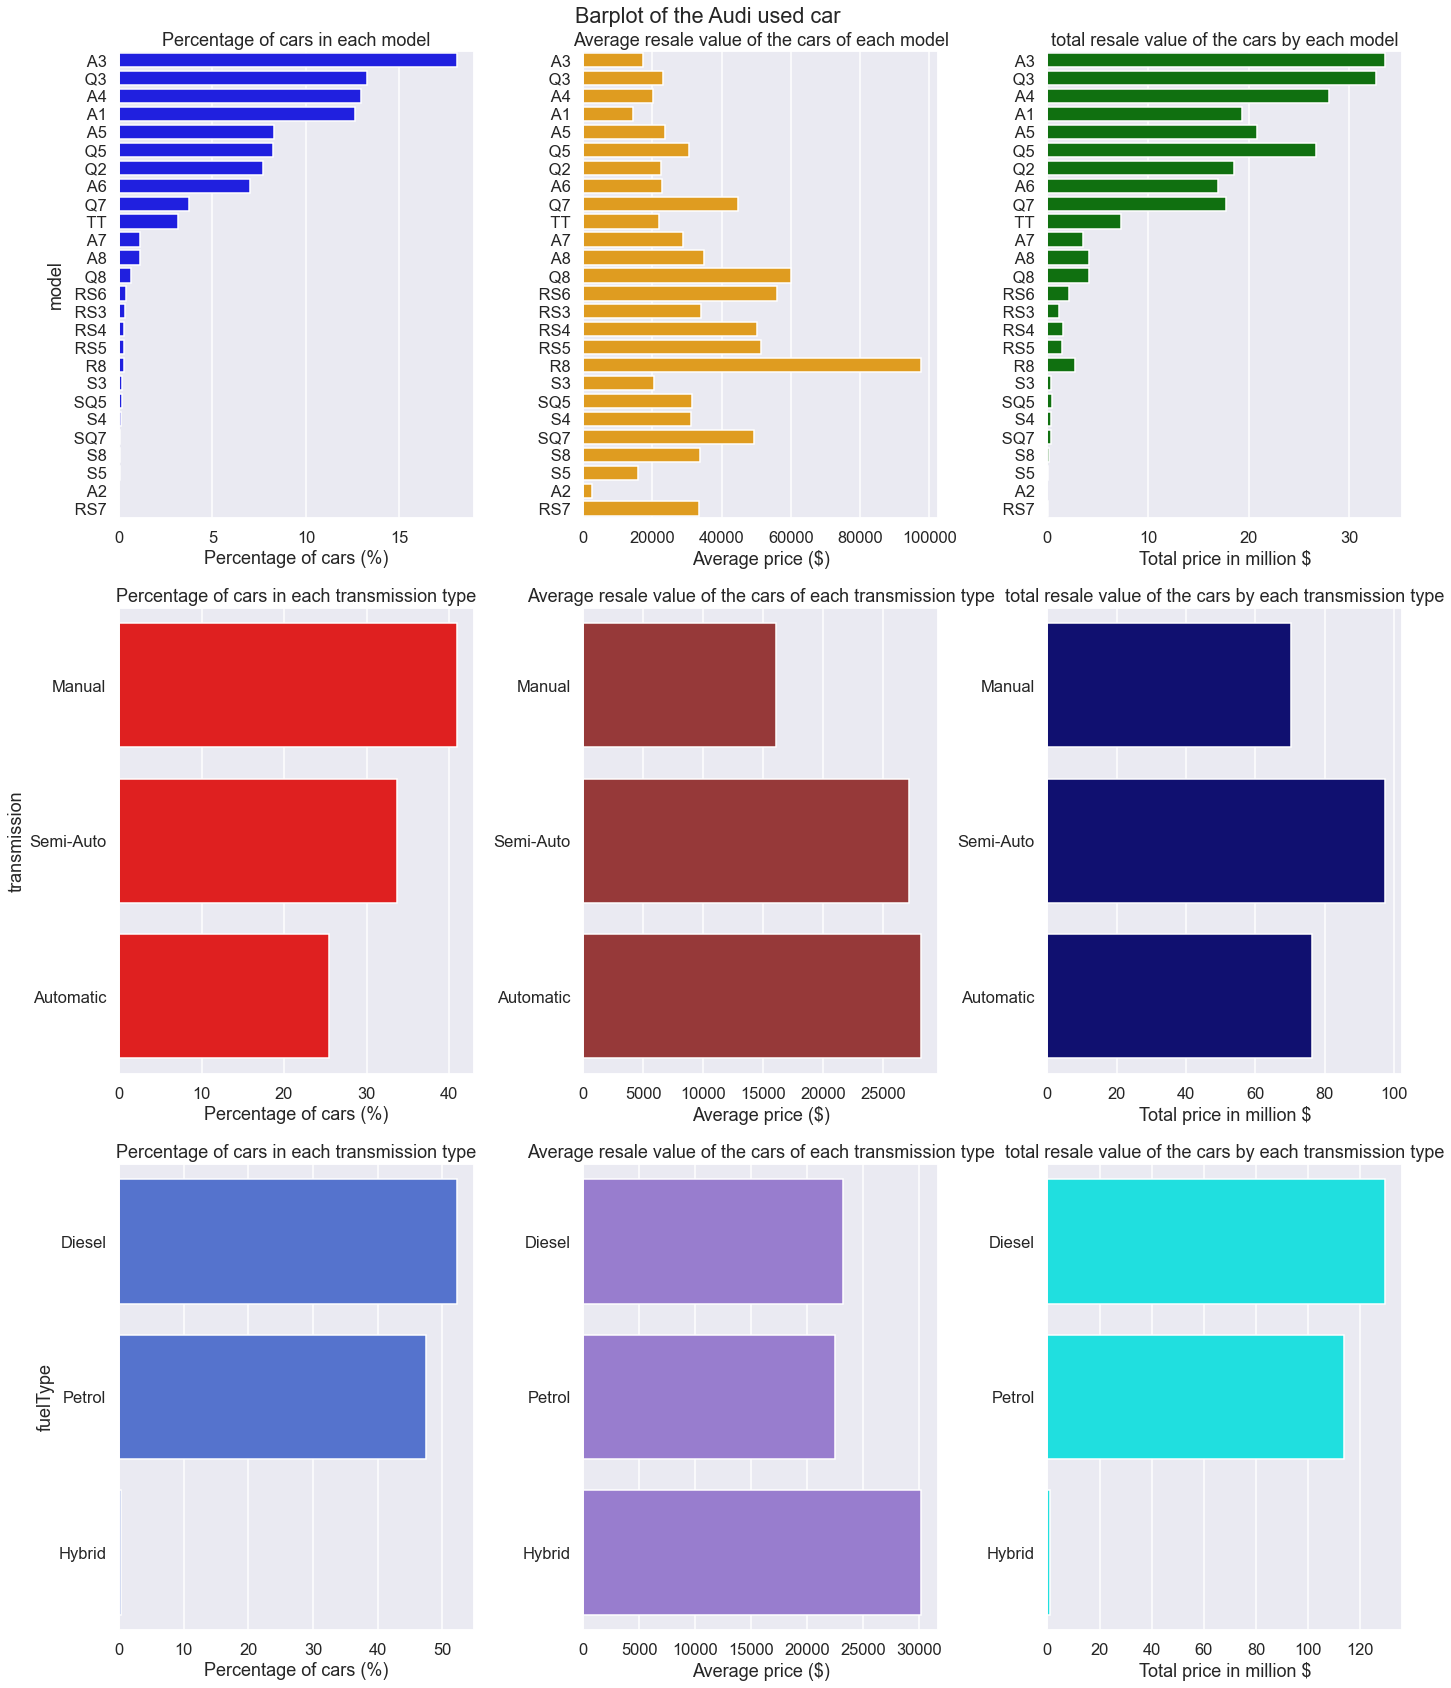

In [121]:
plt.figure(figsize=(20,24))

plt.subplot(3, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model_sorted.index, data=df_agg_model_sorted, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(3, 3, 2)
sns.barplot(x='mean', y=df_agg_model_sorted.index, data=df_agg_model_sorted, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 3)
sns.barplot(x='sum', y=df_agg_model_sorted.index, data=df_agg_model_sorted, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.subplot(3, 3, 4)
sns.barplot(x='percent_of_cars', y=df_pivot_transmission_sorted.index, data=df_pivot_transmission_sorted, orient='h', color='red')
plt.title("Percentage of cars in each transmission type")
plt.xlabel("Percentage of cars (%)")

plt.subplot(3, 3, 5)
sns.barplot(x=(           'mean', 'price'), y=df_pivot_transmission_sorted.index, data=df_pivot_transmission_sorted, orient='h', color='brown')
plt.title("Average resale value of the cars of each transmission type")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 6)
sns.barplot(x=(            'sum', 'price'), y=df_pivot_transmission_sorted.index, data=df_pivot_transmission_sorted, orient='h', color='navy')
plt.title("total resale value of the cars by each transmission type")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.subplot(3, 3, 7)
sns.barplot(x='percent_of_cars', y=df_pivot_fuelType_sorted.index, data=df_pivot_fuelType_sorted, orient='h', color='royalblue')
plt.title("Percentage of cars in each fuel type")
plt.xlabel("Percentage of cars (%)")

plt.subplot(3, 3, 8)
sns.barplot(x=(           'mean', 'price'), y=df_pivot_fuelType_sorted.index, data=df_pivot_fuelType_sorted, orient='h', color='mediumpurple')
plt.title("Average resale value of the cars of each fuel type")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 9)
sns.barplot(x=(            'sum', 'price'), y=df_pivot_fuelType_sorted.index, data=df_pivot_fuelType_sorted, orient='h', color='cyan')
plt.title("total resale value of the cars by each fuel type")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

And that is the end of the exploration, thank you so much for your valuable time.